In [1]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
library(forecast )

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


In [3]:
library(fpp2)

Warning message:
"package 'fpp2' was built under R version 3.6.2"Loading required package: fma
Warning message:
"package 'fma' was built under R version 3.6.2"Loading required package: expsmooth
Warning message:
"package 'expsmooth' was built under R version 3.6.2"

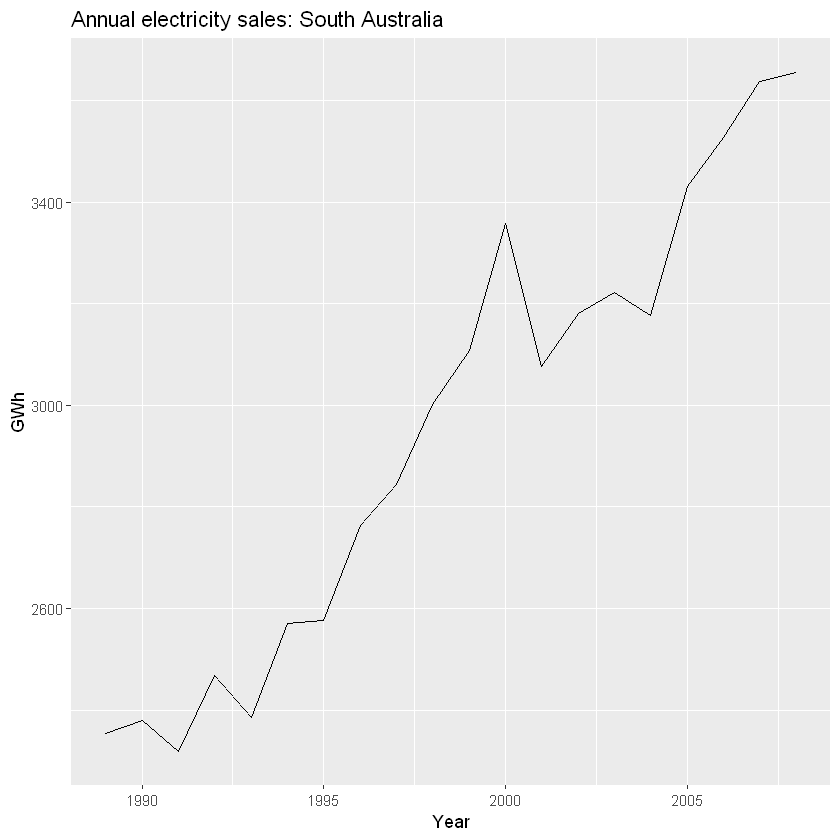

In [4]:
autoplot(elecsales) + xlab("Year") + ylab("GWh") +
  ggtitle("Annual electricity sales: South Australia")

In [6]:
a  <- ma(elecsales, 5)

Warning message:
"Removed 4 rows containing missing values (geom_path)."

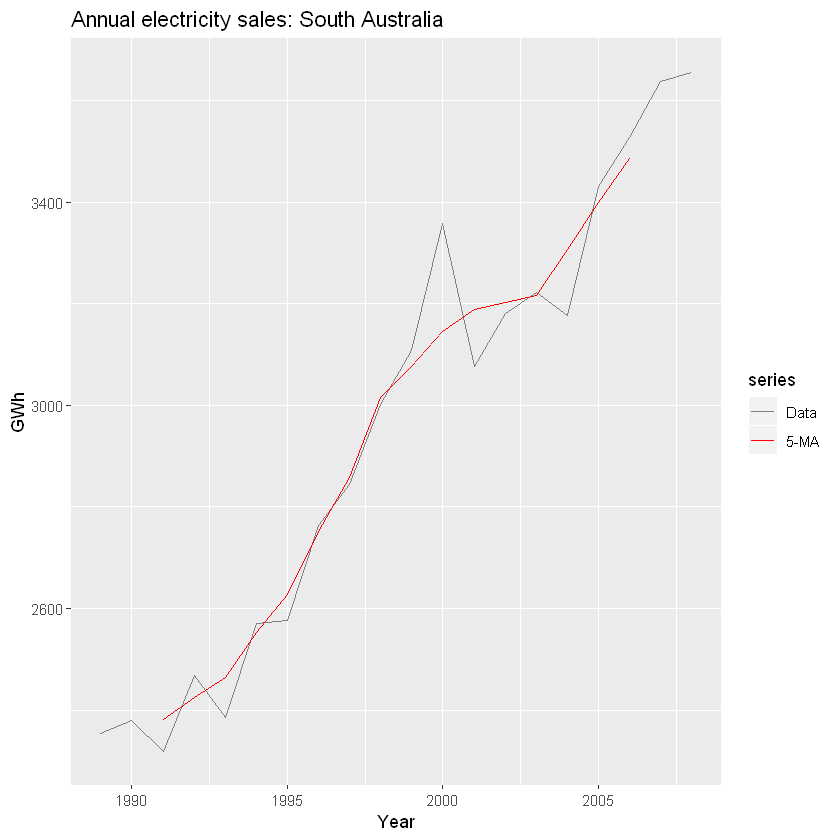

In [8]:
autoplot(elecsales, series="Data") +
  autolayer(ma(elecsales,5), series="5-MA") +
  xlab("Year") + ylab("GWh") +
  ggtitle("Annual electricity sales: South Australia") +
  scale_colour_manual(values=c("Data"="grey50","5-MA"="red"),
                      breaks=c("Data","5-MA"))

In [9]:
beer2 <- window(ausbeer,start=1992)
ma4 <- ma(beer2, order=4, centre=FALSE)
ma2x4 <- ma(beer2, order=4, centre=TRUE)

Warning message:
"Removed 12 rows containing missing values (geom_path)."

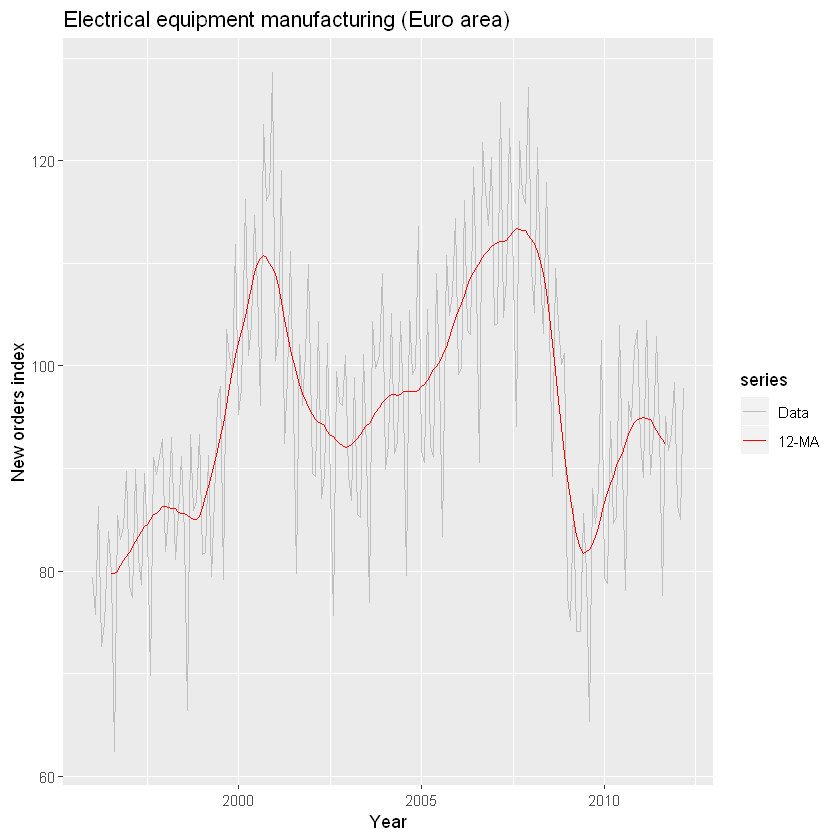

In [10]:
autoplot(elecequip, series="Data") +
  autolayer(ma(elecequip, 12), series="12-MA") +
  xlab("Year") + ylab("New orders index") +
  ggtitle("Electrical equipment manufacturing (Euro area)") +
  scale_colour_manual(values=c("Data"="grey","12-MA"="red"),
                      breaks=c("Data","12-MA"))

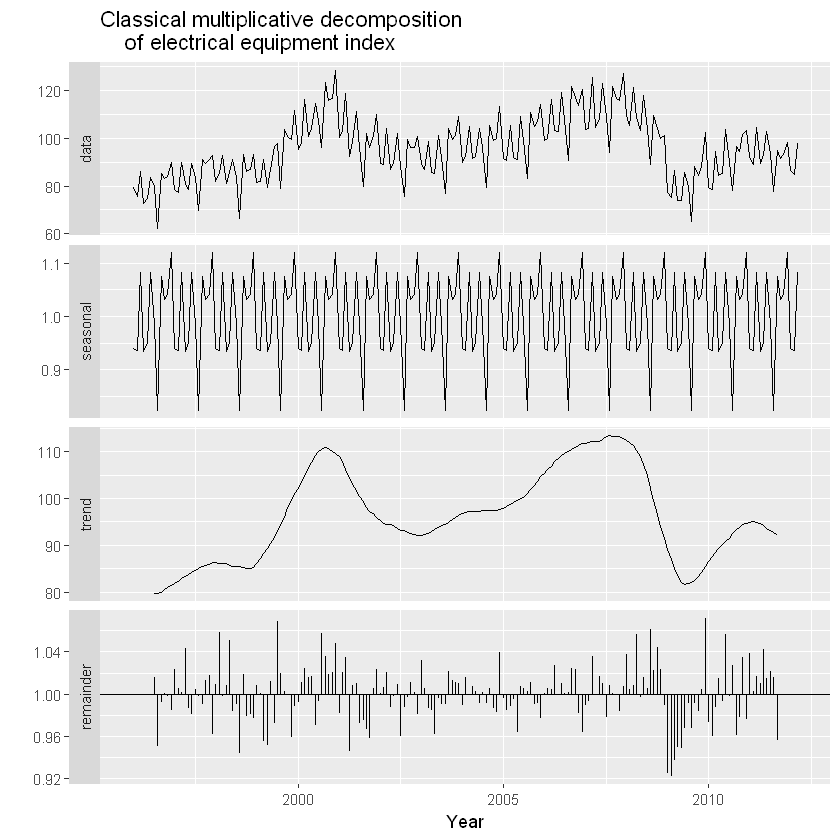

In [11]:
elecequip %>% decompose(type="multiplicative") %>%
  autoplot() + xlab("Year") +
  ggtitle("Classical multiplicative decomposition
    of electrical equipment index")

Warning message:
"package 'seasonal' was built under R version 3.6.2"

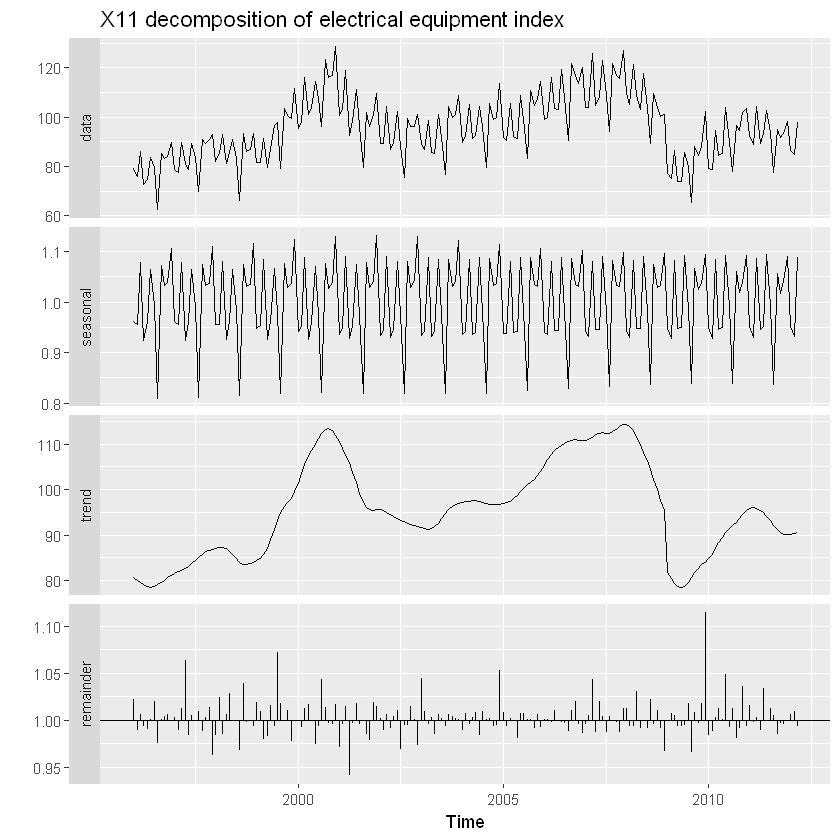

In [12]:
library(seasonal)
elecequip %>% seas(x11="") -> fit
autoplot(fit) +
  ggtitle("X11 decomposition of electrical equipment index")

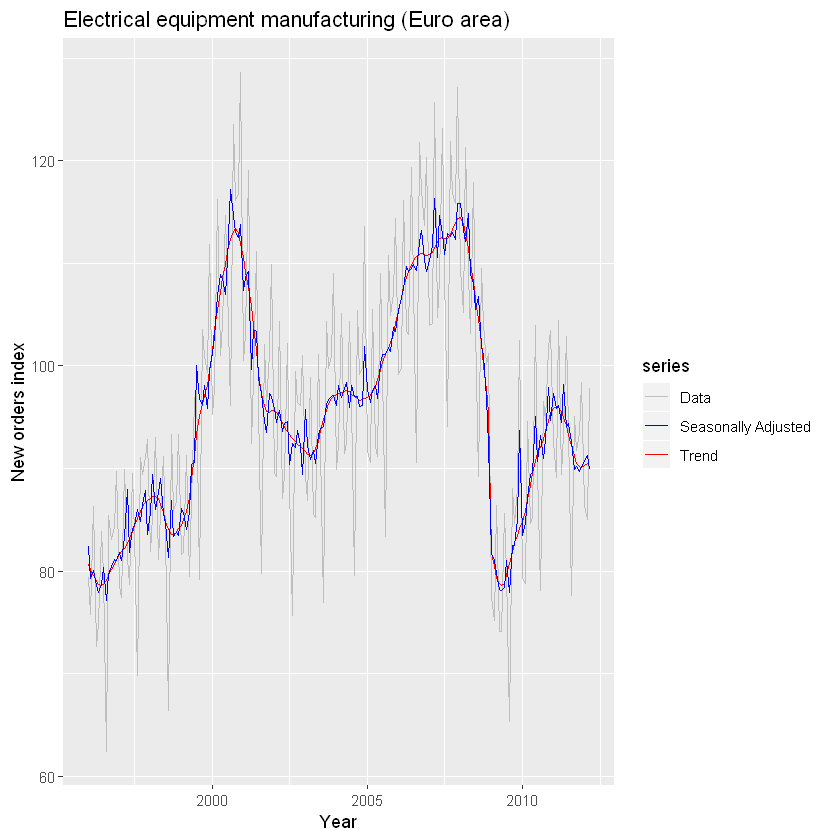

In [13]:
autoplot(elecequip, series="Data") +
  autolayer(trendcycle(fit), series="Trend") +
  autolayer(seasadj(fit), series="Seasonally Adjusted") +
  xlab("Year") + ylab("New orders index") +
  ggtitle("Electrical equipment manufacturing (Euro area)") +
  scale_colour_manual(values=c("gray","blue","red"),
             breaks=c("Data","Seasonally Adjusted","Trend"))

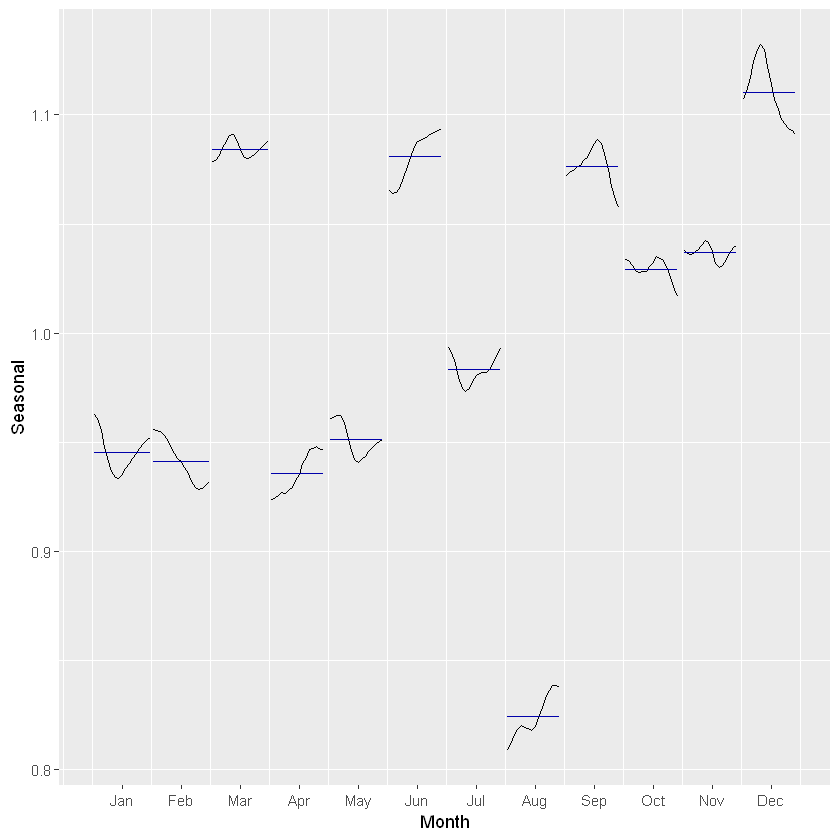

In [14]:
fit %>% seasonal() %>% ggsubseriesplot() + ylab("Seasonal")

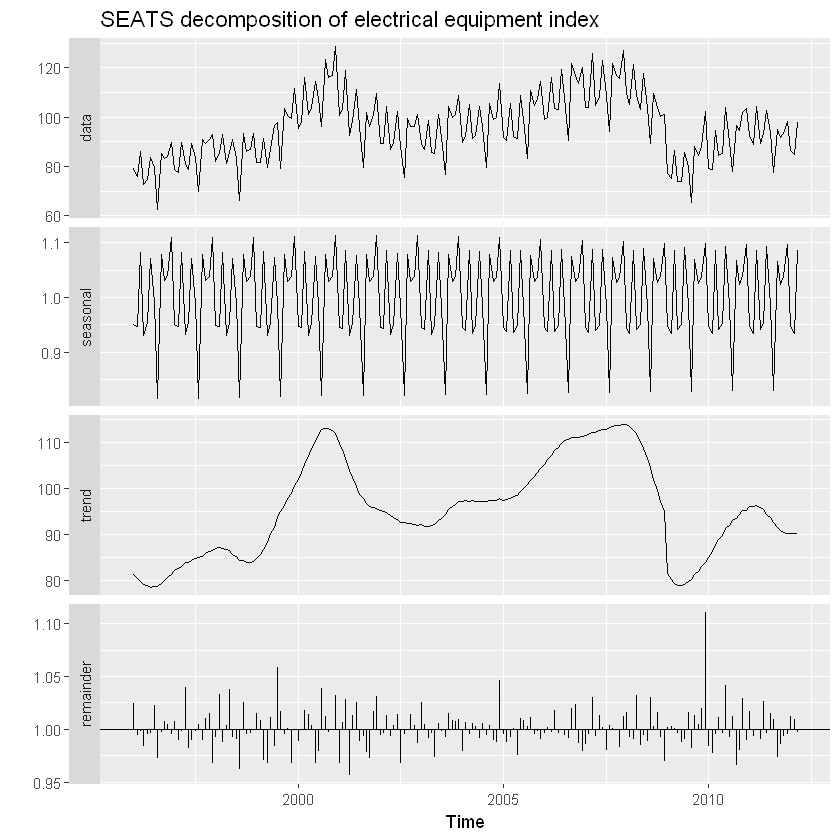

In [15]:
library(seasonal)
elecequip %>% seas() %>%
autoplot() +
  ggtitle("SEATS decomposition of electrical equipment index")

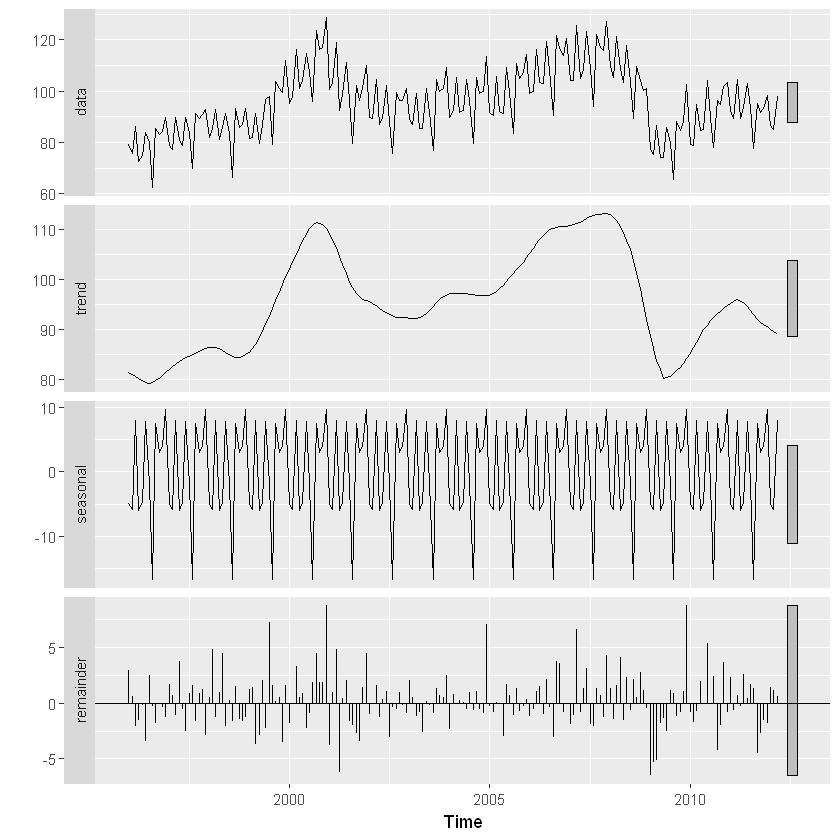

In [16]:
elecequip %>%
  stl(t.window=13, s.window="periodic", robust=TRUE) %>%
  autoplot()

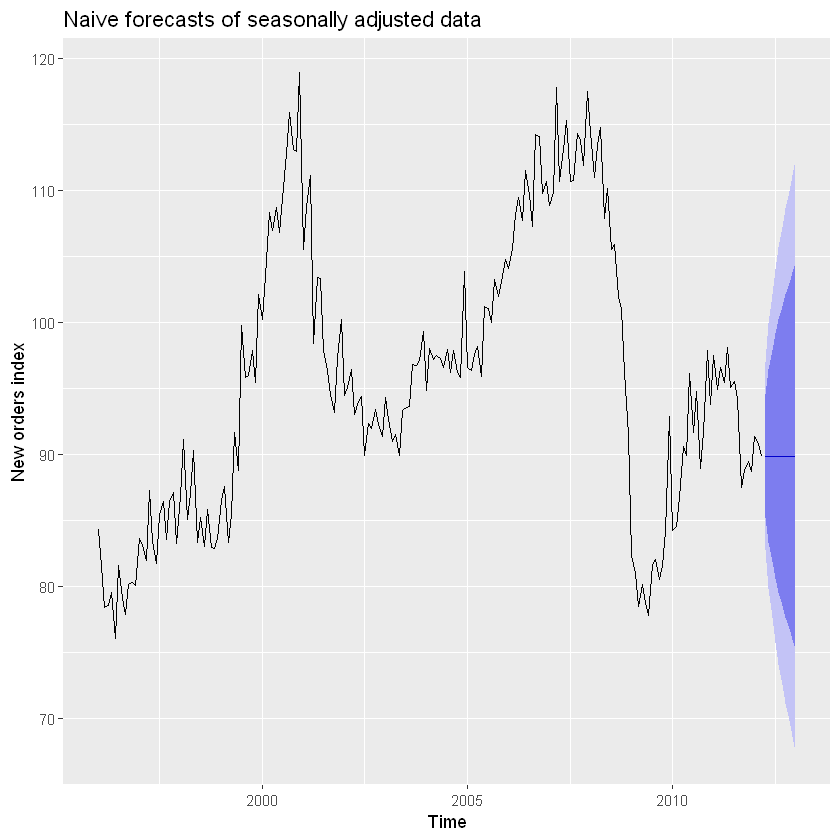

In [17]:
fit <- stl(elecequip, t.window=13, s.window="periodic",
  robust=TRUE)
fit %>% seasadj() %>% naive() %>%
  autoplot() + ylab("New orders index") +
  ggtitle("Naive forecasts of seasonally adjusted data")

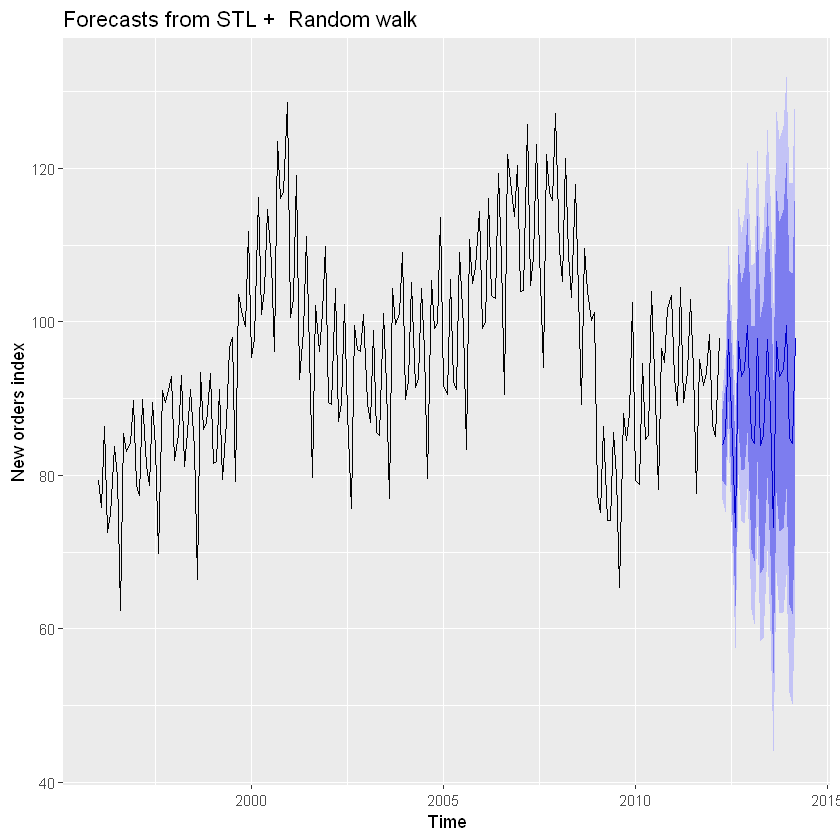

In [18]:
fit %>% forecast(method="naive") %>%
  autoplot() + ylab("New orders index")

In [19]:
fcast <- stlf(elecequip, method='naive')

In [20]:
fcast

         Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
Apr 2012        89.7303 85.56413  93.89648 83.35869  96.10192
May 2012        89.7303 83.83844  95.62217 80.71948  98.74113
Jun 2012        89.7303 82.51427  96.94633 78.69434 100.76627
Jul 2012        89.7303 81.39795  98.06265 76.98707 102.47354
Aug 2012        89.7303 80.41445  99.04616 75.48294 103.97767
Sep 2012        89.7303 79.52530  99.93531 74.12310 105.33751
Oct 2012        89.7303 78.70764 100.75297 72.87259 106.58801
Nov 2012        89.7303 77.94658 101.51403 71.70865 107.75195
Dec 2012        89.7303 77.23178 102.22883 70.61546 108.84515
Jan 2013        89.7303 76.55570 102.90491 69.58148 109.87912
Feb 2013        89.7303 75.91266 103.54794 68.59804 110.86256
Mar 2013        89.7303 75.29825 104.16236 67.65838 111.80223
Apr 2013        89.7303 74.70894 104.75166 66.75711 112.70349
May 2013        89.7303 74.14190 105.31871 65.88990 113.57071
Jun 2013        89.7303 73.59477 105.86583 65.05314 114.40747
Jul 2013